In [1]:
%matplotlib inline
import datetime as dt
import pandas as pd
import sys
import csv
import glob
import ipywidgets #as widgets
import itertools
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import socket

from matplotlib import *
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
from matplotlib.dates import *
#style.use('ggplot')
from numpy.random import randn
#from scipy import statss
from pandas import  DataFrame, Series
import statsmodels.api as sm

sns.set()

import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import HTML
HTML("<style>.container { width:90% !important; }</style>")

/Users/mcmanus/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
today = dt.datetime.today().strftime("%y%m%d")
today

'181119'

# Check PHIS files

### Filenames (addressdata correspond to the folder where you have the csv files. If they are on a the same folder, on a subfolder called `Data`, you could just use `./Data/`)

In [4]:
#addressdata = "/Volumes/MCMANUS/Data"
addressdata = "./Data/"

This will show you the files on addressdata

In [5]:
filenames = glob.glob(addressdata+'*')
filenames = sorted([os.path.basename(x) for x in filenames])
filenames

['2016_APRDRGandCaseMixWeights.csv',
 '2016_CPT.csv',
 '2016_ClinicalSummary.csv',
 '2016_DailyCensus.csv',
 '2016_Diagnosis.csv',
 '2016_ImagingSummary.csv',
 '2016_PatientAbstract.csv',
 '2016_Procedure.csv',
 '2016_RCCBasedCost.csv',
 '2016_Readmit.csv',
 '2017_APRDRGandCaseMixWeights.csv',
 '2017_CPT.csv',
 '2017_ClinicalSummary.csv',
 '2017_DailyCensus.csv',
 '2017_Diagnosis.csv',
 '2017_ImagingSummary.csv',
 '2017_PatientAbstract.csv',
 '2017_Procedure.csv',
 '2017_RCCBasedCost.csv',
 '2017_Readmit.csv']

The main files are `2016_PatientAbstract.csv` and `2017_PatientAbstract.csv`. You can read either of them by changing `year` or, if you want to check both, by creating two different dataframes and read them the same way: `phis_2016` and `phis_2017`, for instance. 

In [6]:
year = '2017'
filename = year+'_PatientAbstract.csv'
phis = pd.read_csv(addressdata+filename, dtype=object)


In [7]:
print(filename)
phis.head()

2017_PatientAbstract.csv


,Hospital_Number,Hospital_City,Hospital_Name,Campus_Name,Medical_Record_Number,Discharge_ID,Billing_Number,Patient_Type,Patient_Type_Title,Admit_Age_In_Days,...,Prin_Dx_Mental_Health_Disorder_Flag,Secondary_Dx_Mental_Health_Disorder_Flag,Prin_Dx_Mental_Health_Disorder_Group,Prin_Dx_Mental_Health_Disorder_Group_Title,Clinical_Standardized_Costs,Imaging_Standardized_Costs,Lab_Standardized_Costs,Other_Standardized_Costs,Pharmacy_Standardized_Costs,Supply_Standardized_Costs
0,2011,Birmingham,Children’s of Alabama,NaN,12027972011,146745796,8424147,4,Clinic Visit,4868,...,N,N,0,Not a Mental Health Condition,568.907401891200,0.000000000000,0.000000000000,0.000000000000,0.000000000000,0.000000000000
1,2011,Birmingham,Children’s of Alabama,NaN,14360602011,146731436,8439043,4,Clinic Visit,2410,...,N,N,0,Not a Mental Health Condition,241.502807083950,0.000000000000,0.000000000000,0.000000000000,0.000000000000,0.000000000000
2,2011,Birmingham,Children’s of Alabama,NaN,10605382011,146747016,8446032,4,Clinic Visit,6509,...,N,N,0,Not a Mental Health Condition,99.613973289111,0.000000000000,0.000000000000,0.000000000000,0.000000000000,0.000000000000
3,2011,Birmingham,Children’s of Alabama,NaN,15018892011,146725527,8455292,4,Clinic Visit,1856,...,N,N,0,Not a Mental Health Condition,339.941802413300,0.000000000000,0.000000000000,0.000000000000,0.000000000000,0.000000000000
4,2011,Birmingham,Children’s of Alabama,NaN,13540082011,146729501,8459890,4,Clinic Visit,3594,...,N,N,0,Not a Mental Health Condition,262.026233612800,0.000000000000,0.000000000000,0.000000000000,0.000000000000,0.000000000000


In [8]:
phis[phis.Hospital_City == 'Boston'].Hospital_Name.unique()

array(['Boston Children’s Hospital'], dtype=object)

In [9]:
sorted(list(phis.Hospital_Name.unique()))

["Advocate Children's Hospital",
 'Akron Children’s Hospital',
 "Ann & Robert H. Lurie Children's Hospital of Chicago",
 "Arkansas Children's Hospital",
 'Boston Children’s Hospital',
 "C.S. Mott Children's Hospital University of Michigan Health System",
 "Children's Health Dallas",
 "Children's Healthcare of Atlanta",
 "Children's Hospital Los Angeles",
 "Children's Hospital of Orange County",
 "Children's Hospital of Philadelphia",
 "Children's Hospital of Wisconsin",
 "Children's Memorial Hermann Hospital",
 'Children’s Hospital & Medical Center',
 'Children’s Hospital Colorado',
 'Children’s Hospital of The King’s Daughters',
 'Children’s Hospitals and Clinics of Minnesota',
 'Children’s Mercy Kansas City',
 'Children’s National Health System',
 'Children’s of Alabama',
 "Cincinnati Children's Hospital Medical Center",
 "Comer Children's Hospital",
 "Connecticut Children's Medical Center",
 'Cook Children’s Medical Center',
 "Dell Children's Medical Center of Central Texas",
 "Dris

In [10]:
phis.Source_Of_Admission_Title.value_counts()

The patient presents to this facility with an order from a physician for services or seeks scheduled services for which an order is not required (e.g., mammography). Includes non-emergent self referrals.    1321020
The patient was referred to this facility for outpatient or referenced diagnostic services.                                                                                                                    1014657
The patient was admitted to this facility upon an order of a physician.                                                                                                                                         360030
The means by which the patient was referred to this hospital’s outpatient department is not known.                                                                                                              311875
The patient was admitted to this facility as a hospital transfer from an acute care facility where he or she was an inpatient or an outpatie

In [11]:
list(phis.columns)

['Hospital_Number',
 'Hospital_City',
 'Hospital_Name',
 'Campus_Name',
 'Medical_Record_Number',
 'Discharge_ID',
 'Billing_Number',
 'Patient_Type',
 'Patient_Type_Title',
 'Admit_Age_In_Days',
 'Admit_Age_In_Years',
 'Birthweight_Grams',
 'Birth_Weight_Indicator',
 'Birth_Weight_Indicator_Title',
 'Gestational_Age_In_Weeks',
 'DOB',
 'Gender',
 'Gender_Title',
 'Ethnicity',
 'Ethnicity_Title',
 'CTC_Flag',
 'Race-White',
 'Race-Black',
 'Race-Asian',
 'Race-Pacific_Islander',
 'Race-American_Indian',
 'Race-Other',
 'Race-Version_1',
 'Race_Title-Version_1',
 'Length_Of_Stay',
 'Disposition',
 'Disposition_Title',
 'Disposition-Version_1',
 'Disposition_Title-Version_1',
 'ED_Charge_Flag',
 'NICU_Flag',
 'ICU_Flag',
 'Mechanical_Vent_Flag',
 'ECMO_Flag',
 'TPN_Flag',
 'Operating_Room_Charge_Flag',
 'Infection_Flag',
 'Medical_Complication_Flag',
 'Surgical_Complication_Flag',
 'Version_1_Flag',
 'Priority_Of_Admission',
 'Priority_Of_Admission_Title',
 'Priority_Of_Admission-V1',
 '

In [12]:
phis[['Admit_Age_In_Days', 'Admit_Age_In_Years']].sample(20)

,Admit_Age_In_Days,Admit_Age_In_Years
1230266,3299,9
324020,640,1
1286055,645,1
1027562,314,0
3029900,5439,14
1806462,5834,15
2739810,5132,14
1455247,18,0
57284,1545,4
292986,1553,4


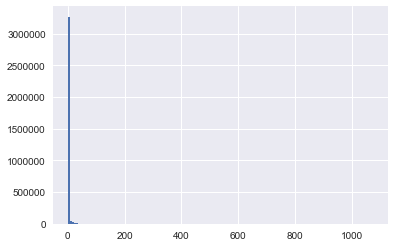

In [13]:
phis.Length_Of_Stay.astype(float).hist(bins=150)

In [14]:
phis['ICU_Flag'].value_counts()

N    3268565
Y     113818
Name: ICU_Flag, dtype: int64

In [15]:
phis['Patient_Type_Title'].value_counts()

Clinic Visit    1900374
Inpatient        660128
Amb Surg         587225
Obs Unit         234656
Name: Patient_Type_Title, dtype: int64

In [16]:
phis['Principal_Dx_Title_(ICD)'].value_counts()[:20]

Dental caries, unspecified                                                  50643
Hypertrophy of tonsils with hypertrophy of adenoids                         41779
Encounter for antineoplastic chemotherapy                                   40280
Single liveborn infant, delivered vaginally                                 36454
Encounter for routine child health examination without abnormal findings    27032
Single liveborn infant, delivered by cesarean                               19918
Acute pharyngitis, unspecified                                              19146
Obstructive sleep apnea (adult) (pediatric)                                 18416
Otitis media, unspecified, bilateral                                        18151
Feeding difficulties                                                        18057
Constipation, unspecified                                                   17604
Unspecified convulsions                                                     17181
Type 1 diabetes 

In [17]:
phis['Principal_Px_Title_(ICD)'].value_counts()[:20]

No PX Title Available                                                                                           2624529
Drainage of Left Middle Ear with Drainage Device, Open Approach                                                   27912
Resection of Tonsils, External Approach                                                                           26564
Resection of Prepuce, External Approach                                                                           24599
Excision of Duodenum, Via Natural or Artificial Opening Endoscopic, Diagnostic                                    23742
Drainage of Spinal Canal, Percutaneous Approach, Diagnostic                                                       18219
Resection of Appendix, Percutaneous Endoscopic Approach                                                           17418
Delivery of Products of Conception, External Approach                                                             17003
Introduction of Serum, Toxoid and Vaccin

In [18]:
#phis['Median_Household_Income'].value_counts()[0:20]

In [19]:
phis.Medical_Record_Number.value_counts()[0:20]

11845812011    372
14154322011    372
12453172011    369
16992312011    366
13615352011    366
12772012011    366
16430732011    364
17472562011    358
16900252011    344
13979622011    337
14437352011    327
14186472011    322
17489672011    278
11356542011    267
17397532011    262
16513372011    260
17666702011    237
17214482011    225
13862552011    204
17525442011    191
Name: Medical_Record_Number, dtype: int64

In [20]:
phis.Discharge_ID.value_counts()[0:20]

153820065    1
149381841    1
159506737    1
156958932    1
144984240    1
144252565    1
155888154    1
161975989    1
147960009    1
144733641    1
151345340    1
151584647    1
156998787    1
148148586    1
156992764    1
150404067    1
161944111    1
158436145    1
155836119    1
153540666    1
Name: Discharge_ID, dtype: int64

In [21]:
phis.groupby(['Medical_Record_Number'])

### Other files

Remember we created a list of the files available at `./Data/` called `filenames`. Below you can read any of those files just calling them by their number on the list.

In [26]:
filenames

['2016_APRDRGandCaseMixWeights.csv',
 '2016_CPT.csv',
 '2016_ClinicalSummary.csv',
 '2016_DailyCensus.csv',
 '2016_Diagnosis.csv',
 '2016_ImagingSummary.csv',
 '2016_PatientAbstract.csv',
 '2016_Procedure.csv',
 '2016_RCCBasedCost.csv',
 '2016_Readmit.csv',
 '2017_APRDRGandCaseMixWeights.csv',
 '2017_CPT.csv',
 '2017_ClinicalSummary.csv',
 '2017_DailyCensus.csv',
 '2017_Diagnosis.csv',
 '2017_ImagingSummary.csv',
 '2017_PatientAbstract.csv',
 '2017_Procedure.csv',
 '2017_RCCBasedCost.csv',
 '2017_Readmit.csv']

In [34]:

filename2 = filenames[8]
print(filename2+ ' is open')
phis2 = pd.read_csv(addressdata+filename2, dtype=object)

2016_RCCBasedCost.csv is open


In [29]:
list(phis2.columns)

['Medical_Record_Number',
 'Discharge_ID',
 'Billing_Number',
 'Discharge_Date',
 'Adj_Total_Costs_(RCC_Based)',
 'Total_Costs_(RCC_Based)']

In [30]:
phis2.head()
#phis.Dx_Number.value_counts()

,Medical_Record_Number,Discharge_ID,Billing_Number,Discharge_Date,Adj_Total_Costs_(RCC_Based),Total_Costs_(RCC_Based)
0,4230422039,120841667,E032025137,01/05/2016,0,0
1,6495422039,120841661,E032025064,01/05/2016,0,0
2,4911872039,120841567,E032023011,01/05/2016,0,0
3,6729602039,120841617,E032024181,01/05/2016,0,0
4,6797102039,120841446,E032020783,01/05/2016,0,0


In [ ]:
phis2.Medical_Record_Number.value_counts()[0:20]

In [ ]:
phis2.Discharge_ID.value_counts()[0:20]

In [ ]:
phis2[phis2.Billing_Number == '4906931']